#  Introduction

The goal of this project is building a random forest classifier from scratch, using only numpy and pandas. We will start by building a decision tree classifier, and we will later use this to build a random forest classifier. 

# Import Toy Datasets and Test Scikit-Learn's Decision Tree Classifier 

In [33]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

### Iris Dataset

Let's import the iris dataset as a toy dataset. 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [3]:
iris_df['target'].value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.shape

(150, 5)

As we can see, the advantage of using the iris dataset is that the size of the dataset is relatively small, and so the training time of our algorithm shouldn't be too large. Also, this dataset has 3 (balanced) target classes, and so we check whether our model can handle a non-binary target. However, the dataset only contains continuous variables. Since we want to make sure that out algorithm can handle discrete variables, let's make one continuous variable a binary variable.

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
new_column_names = {'sepal length (cm)': 'sepal_length_cm',
                    'sepal width (cm)': 'sepal_width_cm',
                    'petal length (cm)': 'petal_length_cm',
                    'petal width (cm)': 'petal_width_cm'}


iris_df = iris_df.rename(columns=new_column_names)

print(iris_df.columns)


Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'target'],
      dtype='object')


In [8]:
iris_df['wide_sepal']=1
iris_df['sepal_width_cm']<iris_df['sepal_width_cm'].mean()
iris_df.loc[iris_df['sepal_width_cm']<iris_df['sepal_width_cm'].mean(),'wide_sepal']=0
iris_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,wide_sepal
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [9]:
df = iris_df.drop('sepal_width_cm', axis=1)

In [10]:
df['wide_sepal'].value_counts(normalize=True)

0    0.553333
1    0.446667
Name: wide_sepal, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   petal_length_cm  150 non-null    float64
 2   petal_width_cm   150 non-null    float64
 3   target           150 non-null    int32  
 4   wide_sepal       150 non-null    int64  
dtypes: float64(3), int32(1), int64(1)
memory usage: 5.4 KB


Thus, we used the sepal_width_cm column to create a new binary column named wide_sepal. Specifically, this variable is 0 if the width of a flower's sepal is smaller than the average of the dataset, and it is 1 otherwise. 

We can now proceed to separate the dataset into training and testing data.

In [12]:
from sklearn.model_selection import train_test_split
X, y = df.drop('target', axis=1), df.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.2, random_state=24)

### Breast Cancer Dataset

The iris dataset is a very useful basic toy dataset. However, we would also like a toy dataset with a larger number of rows and columns so that it that potential performance issues in our model are easier to identify. To do this, we will use the breast cancel dataset as our second toy dataset. 

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Convert the data to a pandas DataFrame
df_cancer = pd.DataFrame(X, columns=cancer.feature_names)
df_cancer['target'] = y

# Rename the columns to replace spaces with underscores
df_cancer.columns = df_cancer.columns.str.replace(' ', '_')

# Split the dataset into training and test sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(df_cancer.drop('target', axis=1), df_cancer['target'], test_size=0.2, random_state=24)


In [14]:
df_cancer.shape

(569, 31)

In [15]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [17]:
df_cancer['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

As we can see, this dataset has more rows and way more columns than the iris dataset, and the target has fairly balanced classes. 

### Scikit-Learn's Decision Tree Classifier 

We would now like to briefly review scikit-learn's decision tree classifier and assess its training time on our toy datasets. 

In [310]:
clf_iris = DecisionTreeClassifier()

t_1 = time.time()
clf_iris.fit(X_train_iris, y_train_iris)
t_2 = time.time()
y_pred_iris = clf_iris.predict(X_test_iris)
t_3 = time.time()

iris_tree_training_time = t_2 - t_1
iris_tree_prediction_time = t_3 - t_2 

print(f'Iris training time: {iris_tree_training_time} seconds')
print(f'Iris prediction time: {iris_tree_prediction_time} seconds')

Iris training time: 0.0045146942138671875 seconds
Iris prediction time: 0.007011890411376953 seconds


In [321]:
clf_cancer = DecisionTreeClassifier()

t_1 = time.time()
clf_cancer.fit(X_train_cancer, y_train_cancer)
t_2 = time.time()
y_pred_cancer = clf_cancer.predict(X_test_cancer)
t_3 = time.time()

cancer_tree_training_time = t_2 - t_1
cancer_tree_prediction_time = t_3 - t_2 

print(f'Cancer training time: {cancer_tree_training_time} seconds')
print(f'Cancer prediction time: {cancer_tree_prediction_time} seconds')

Cancer training time: 0.013775825500488281 seconds
Cancer prediction time: 0.004000186920166016 seconds


Thus, both modes are trained in much less than one second and the training time for the iris dataset is one order of magnitude smaller than the one for the breast cancer dataset. 

The default hyperparameters for scikit-learn's decision tree classifier are 
> **criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0** 

Of these, we are only interested in 
> **criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, max_leaf_nodes=None**

Specifically:
- **criterion='gini'** indicates what criterion to use to evaluate the quality of a split 
- **splitter='best'** indicates that the best split is performed
- **max_depth=None** indicates that there is no limit to the depth of the tree; if another value is selected, all nodes that reach that depth will become leaves
- **min_samples_split=2** sets the minimum number of data points that an internal node must have in order to be split; in other words, if a node contains a number of data points smaller than **min_samples_split**, then the node is a leaf and won't be split further
- **min_samples_leaf=1** sets the minimum unmber of data points that a leaf must contain; in this case, **min_samples_leaf=1** and so any leaf that is not empty is allowed
- **max_features=None** indicates the number of features to be used for a split; in this case, since **max_features=None**, all features will be used
- **max_leaf_nodes=None** sets the maximum number of leaves that the tree can have; in this case there is no limit, and the same will be true for our tree

There are other hyperparameters that can be useful but we will not need them. For example, **ccp_alpha** is a hyperparameter used for pruning the tree. However, we will not need to prune our decision trees since we will use them to build a random forest. 



# Building the Decision Tree Classifier

As we saw in the previous section, scikit-learn's decision tree classifier has several hyperparameters, and needs training data (not containing the target) and the corresponding target in order to be fitted. Once the model has been fitted, it needs new data to make predictions. Our goal is to write a function whose variables are the training data, the training target, and the hyperparameters needed to set stopping conditions and to put some constraints on the tree. The output of this function will be a set of rules that describe how the data was split into leaves. Then, we will write a function that uses the leaves produced by the fitted model and a new dataset in order to make predictions. The predictions produced by this function will be organized in a NumPy array. 

In order to fit the tree, we will need a few functions:
- A function to calcualte the Gini index
- A function to find the best split value in a given column
- A function to determine the best split in the data contained in an internal node 

Let's start by coding a function that calculates the Gini index for a potential node. Given a subset of the dataset, the Gini index $G$ is $$G = 1 - \sum_{k=1}^K p_k^2$$ where $K$ is the number of classes in the target variable and $p_k$ is the proportion of data points that belong to class $k$. If a node is pure, meaning that all data points belong to the same class, the Gini index is zero. On the contrary, it gets close to $1$ if the node is impure, so that $p_k$ is small for all $k$'s. 

In [20]:
def getGiniIndex(y):
    #calculate gini index for values in a node
    probSquared = np.array([])
    y.shape[0]
    for i in np.unique(y):
        prob = np.divide(np.count_nonzero(y == i),y.shape[0])
        probSquared=np.append(probSquared,np.square(prob))
    return 1-np.sum(probSquared)

Next, we need a function that uses the Gini index to perform the best split in a given column.

In [21]:
def bestColumnSplit(column,y):
    # given a column, it returns the value of the best split 
    # and its weighted Gini index
    best_cut_value = 0
    weigted_Gini_of_best_cut = 2
    for i in np.unique(column):
        y_leaf_1 = y[column<i]
        y_leaf_2 = y[column>=i]
        gini_1 = getGiniIndex(y_leaf_1)
        gini_2 = getGiniIndex(y_leaf_2)
        weighted_Gini = gini_1*(np.divide(y_leaf_1.shape[0],y.shape[0]))+gini_2*(np.divide(y_leaf_2.shape[0],y.shape[0]))
        if weighted_Gini < weigted_Gini_of_best_cut:
            weigted_Gini_of_best_cut = weighted_Gini
            best_cut_value = i
    return (best_cut_value,weigted_Gini_of_best_cut,column.name)       

This function starts with a weighted Gini index value of 2 (which is higher than the maximum possible value of 1) and a best cut value of 0. Then it iterates through all values in the column and it calculates the weighted Gini index for the two potential nodes the split would give. If it finds a weighted Gini index lower of the current lowest weighted Gini, it updates this value and stores the split value that produced the new best weighted Gini index. The function returns the value at which the data should be split, the weighted Gini index of this split, and the column name. 

One potential issue of this function is that it needs to iterate through all values contained in the column. If the column is a binary variable with only two values, this function executes really fast. However, if the column is a continuous variable, the function might be very slow because all entries might be unique values, and so the function might have to check hundreds or thousands of potential splits.

Next, we use the **bestColumnSplit** function to obtain the best split in a subset.  

In [22]:
def bestSubsetSplit(x,y):
    results = np.array((np.nan,2,np.nan))
    for column in x.columns:
        a=np.array(bestColumnSplit(x[str(column)],y))
        results = np.vstack((results,a))
    row_best_cut = results[:,1].argmin()
    # return best cut value and column name
    return (float(results[row_best_cut,0]),results[row_best_cut,2])

As we can see in the above cell, this function uses the **bestColumnSplit** on each column and it stores its outputs in a NumPy array with 3 columns. At the end, it returns the row corresponding to the cut that produced the purest nodes (i.e. the ones that have the lowest weighted Gini index). Like **bestColumnSplit**, **bestSubsetSplit** returns the best cut value, the weighted Gini index that the split produces, and the name of the variable. 

Now we can write the function to train the decision tree. However, it is convenient to first define a few more functions.

In [23]:
def subset_not_in_leaves(subset, leaves):
    for leaf in leaves:
        if subset[0].equals(leaf[0]) and subset[1]==leaf[1] and subset[2]==leaf[2]:
            return False
    return True

**subset_not_in_leaves** checks whether a subset of the data is contained in the list of leaves. It is convenient to define a function to do this because we need to check a few conditions. The function returns `True` if the subset is *not* in the list of leaves and `False` otherwise.

In [24]:
def remove_subset_from_nodes(subset,nodes):
    # This only removes the subset once. Ideally, nodes should not contain the same subset more than once.
    for i, node in enumerate(nodes):
        if subset[0].equals(node[0]) and subset[1]==node[1] and subset[2]==node[2]:
            nodes.pop(i)
    return nodes
            

Similarly to **subset_not_in_leaves**, **remove_subset_from_nodes** checks whether a subset of the data is in the list of internal nodes. If so, the node is removed from the list. 

In [25]:
def restructure_leaves(leaves):
    new_leaves = []
    for leaf in leaves: 
        new_leaf = (leaf[3], leaf[1], leaf[2])
        new_leaves.append(new_leaf)
    return new_leaves

**restructure_leaves** changes the order in which the information regarding a leaf is stored in a tuple. 

Finally, we can define the function we will need to fit a classification decision tree.

In [306]:
def model_fit(x,y,max_depth,min_samples_split,min_samples_leaf):
    df = x.copy()
    # subset = (mask, prediction, depth, query)
    potential_nodes = [(pd.Series([np.nan,np.nan]),y.value_counts().idxmax(), 0, 'True')]
    leaves = []
    while len(potential_nodes) != 0:
        for subset in potential_nodes:
            if subset[2]==0:
                dropped_columns=[]
                while True:
                    cut_value, cut_variable = bestSubsetSplit(df.drop(dropped_columns,axis=1),y)
                    mask_1 = df[cut_variable] < cut_value
                    mask_2 = df[cut_variable] >= cut_value
                    if (df[mask_1].shape[0]<min_samples_leaf) | (df[mask_2].shape[0]<min_samples_leaf):
                        dropped_columns.append(cut_variable)
                        if dropped_columns == df.columns.tolist():
                                return "No branches found. Please, try to increase the value of min_samples_leaf."
                    else:
                        break
                prediction_1 = y[mask_1].value_counts().idxmax()
                prediction_2 = y[mask_2].value_counts().idxmax()
                depth = 1
                query_1 = '(' + cut_variable + '<' + f'{cut_value}' + ')'
                query_2 = '(' + cut_variable + '>=' + f'{cut_value}' + ')'
                node_1 = (mask_1, prediction_1, depth, query_1)
                node_2 = (mask_2, prediction_2, depth, query_2)
            else:
                dropped_columns=[]
                while True:
                    cut_value, cut_variable = bestSubsetSplit(df[subset[0]].drop(dropped_columns,axis=1),y[subset[0]]) 
                    mask_1 = (subset[0]) & (df[cut_variable] < cut_value)
                    mask_2 = (subset[0]) & (df[cut_variable] >= cut_value)
                    query_1 = subset[3] + '&' + '(' + cut_variable + '<' + f'{cut_value}' + ')'
                    query_2 = subset[3] + '&' + '(' + cut_variable + '>=' + f'{cut_value}' + ')'
                    if (df[mask_1].shape[0]<min_samples_leaf) | (df[mask_2].shape[0]<min_samples_leaf):
                        dropped_columns.append(cut_variable)
                        if dropped_columns == df.columns.tolist():
                            leaves.append(subset)
                            #potential_nodes.remove(subset)
                            break
                    else:
                        break
                prediction_1 = y[mask_1].value_counts().idxmax()
                prediction_2 = y[mask_2].value_counts().idxmax()
                depth = subset[2]+1
                node_1 = (mask_1, prediction_1, depth, query_1)
                node_2 = (mask_2, prediction_2, depth, query_2)
            # check if the new nodes are leaves 
            if subset_not_in_leaves(subset,leaves):
                if node_1[2] == max_depth or df[mask_1].shape[0] <= min_samples_split or y[mask_1].unique().shape[0]==1:
                    leaves.append(node_1)
                else:
                    potential_nodes.append(node_1)
                if node_2[2] == max_depth or df[mask_2].shape[0] <= min_samples_split or y[mask_2].unique().shape[0]==1:
                    leaves.append(node_2)
                else:
                    potential_nodes.append(node_2)
            potential_nodes = remove_subset_from_nodes(subset,potential_nodes)
    return restructure_leaves(leaves) 

The variables of this function are:
- **x**: the training data, organized in a pandas dataframe 
- **y**: the training target stored in a pandas series 
- **max_depth**: hyperparameter constraining the maximum depth of the decision tree
- **min_samples_split**: hyperparameter setting a limit to the minimum number of data points that can be contained in an internal node
- **min_samples_leaf**: hyperparameter indicating the minimum number of data points that can be contained in a leaf
It is worth pointing out that our function cannot handle nominal categorical variables. Such variables should be hot-encoded into boolean variables. 

By the way the function is built, we have:
- **criterion='gini'**
- **splitter='best'**
- **max_features=None**
- **max_leaf_nodes=None**

The function splits the data into subsets, which have the following basic structure: $$ \text{subset} = (\text{mask}, \text{prediction}, \text{depth}, \text{query}) $$
where
- **mask** is a condition such as `df['column_1'] < 5`. This gives a NumPy array containing `True` and `False`. Although masks are convenient to split the data, they only work on datasets that have the same number of rows. Thus, we cannot use masks obtained from the training data to split the test data. This is why we also need **query**.
- **prediction** is the category that has the highest count in the subset of the data. If the subset is a leaf, this is the prediction that the model would make for data that belong to the leaf.
- **depth** is the depth of the subset. We need to store this value in case we want to contstrain the maximum depth of the decision tree.
- **query** is similar to **mask** but it is a string rather than a Numpy array. For example, `df['column_1'] < 5` is a **mask** while `"df['column_1'] < 5"` is a **query**. The advantage of storing masks as queries is that thanks to queries it is easy to see how the data has been splitted. In additions, queries can be used to make predictions on any dataset that has the same columns as the training dataset. 

The basic way this function works is by dividing the data into subsets, which are part of two possible lists: `potential_nodes` or `leaves`. At the beginning, `potential_nodes` contains the whole training data and `leaves` is empty. At each iteration, the function splits the data using the Gini index as a criterion to make the best *allowed* split among all internal nodes contained in `potential_nodes`. Notice that the best split might not be allowed depending on the value of **min_samples_leaf**. Once a subset is split into two new nodes, the function checks whether either node is actually a leaf. Specifically, a node is a leaf if at least one of these conditions is true:
- the node's depth is equl to the value of **max_depth**
- the number of data samples in the node is smaller than or equal to **min_samples_split**, meaning that the node cannot be further splitted 
- the node is pure, and so we don't need to split it again since the predictions would be the same
If a node is a leaf, then it is added to `leaves`, otherwise it is added to `potential_nodes`. The function stops when there are no more elements in `potential_nodes`, meaning that all the data has been split into subsets that are in `leaves`. The function returnes the subsets in `leaves` structured in the following way: $$ \text{leaf} = (\text{query}, \text{prediction}, \text{depth})$$


Now that we have a function to fit the decision tree, we can write a function to make predictions. 

In [105]:
def model_predict(leaves,x):
    df=x.copy()
    df['y']=np.nan
    for leaf in leaves:
        mask = df.eval(leaf[0])
        df.loc[mask, 'y'] = leaf[1]
    return df['y'].values   

**model_predict** has two variables:
- **leaves**: this is the output of the function **model_fit**.
- **x**: this is the data that we want to make predictions for. It should be organized in a pandas dataset and it should have the same columns as the data that was used to fit the model.

Given the fitted model and a pandas dataframe, this function creates a copy of the dataframe and adds to it a column named `'y'` in which all entries are `np.nan`. Then, for every leaf, the function creates a mask using its **query** and then it uses the mask to enter in the `'y'` column the value of the leaf's **prediction**. At the end, the function returns the values of the `'y'` column, i.e. the predictions for the given data, organized in a NumPy array. 

# Testing the Decision Tree Classifier

We should now test our functions in order to compare them to scikit-learn's corresponding functions. First, let's train decision trees using `model_fit` on the iris dataset and the breast cancer dataset. Since we want to compare these model's to scikit-learn's models that we previously fit, we will set all parameters to scikit-learn's default values. After fitting the decision tree, we will make predictions on the testing data using `model_predict`.

In [312]:
t_1 = time.time()
iris_hard_coded_tree = model_fit(X_train_iris, y_train_iris, np.inf, 2, 1)
t_2 = time.time()
iris_hard_coded_tree_predictions = model_predict(iris_hard_coded_tree, X_test_iris)
t_3 = time.time()

iris_hard_coded_tree_training_time = t_2 - t_1
iris_hard_coded_tree_prediction_time = t_3 - t_2 

print(f'Iris training time: {iris_hard_coded_tree_training_time} seconds')
print(f'Iris prediction time: {iris_hard_coded_tree_prediction_time} seconds')

Iris training time: 0.43599772453308105 seconds
Iris prediction time: 0.059534311294555664 seconds


In [252]:
iris_tree_results = pd.DataFrame({'Scikit-Learn Tree':[iris_tree_training_time,iris_tree_prediction_time],
                                  'Hard-Coded Tree':[iris_hard_coded_tree_training_time,iris_hard_coded_tree_prediction_time]},
                                 index=['Iris Train','Iris Predict'])
iris_tree_results['Ratios'] = iris_tree_results['Hard-Coded Tree']/iris_tree_results['Scikit-Learn Tree']
iris_tree_results

,Scikit-Learn Tree,Hard-Coded Tree,Ratios
Iris Train,0.004160,0.423242,101.736776
Iris Predict,0.001997,0.039793,19.931096


The above table shows that although our hard-coded decision tree is fit in less than 1 second, its training time is roughly 100 times larger than the one for scikit-learns tree. Also, the prediction time of our hard-coded model is roughly 20 times larger than scikit-learn's tree. 

Let's now do the same test for the breast cancer dataset. 

In [313]:
t_1 = time.time()
cancer_hard_coded_tree = model_fit(X_train_cancer, y_train_cancer, np.inf, 2, 1)
t_2 = time.time()
cancer_hard_coded_tree_predictions = model_predict(cancer_hard_coded_tree, X_test_cancer)
t_3 = time.time()

cancer_hard_coded_tree_training_time = t_2 - t_1
cancer_hard_coded_tree_prediction_time = t_3 - t_2 

print(f'Cancer training time: {cancer_hard_coded_tree_training_time} seconds')
print(f'Cancer prediction time: {cancer_hard_coded_tree_prediction_time} seconds')

Cancer training time: 57.664549112319946 seconds
Cancer prediction time: 0.11649060249328613 seconds


In [254]:
cancer_tree_results = pd.DataFrame({'Scikit-Learn Tree':[cancer_tree_training_time,cancer_tree_prediction_time],
                                  'Hard-Coded Tree':[cancer_hard_coded_tree_training_time,cancer_hard_coded_tree_prediction_time]},
                                 index=['Cancer Train','Cancer Predict'])
cancer_tree_results['Ratios'] = cancer_tree_results['Hard-Coded Tree']/cancer_tree_results['Scikit-Learn Tree']
cancer_tree_results

,Scikit-Learn Tree,Hard-Coded Tree,Ratios
Cancer Train,0.008660,58.161451,6715.857422
Cancer Predict,0.003001,0.122673,40.880820


The ratio of the prediction times is still of order $10^1$, but the ratio of the fitting times is now of order $10^3$. This means that our hard-coded decision tree is significantly slower on this dataset. We believe that this is because our algorithm iterates through all unique values of each column to determine the best cut at each step. Since the breat cancer dataset has many more columns, more rows, and is made of of floats only (except for the target), our algorithm has to iterate to a large number of unique values to fit the decision tree. When we will train a random forest on this dataset, we expect that the fitting time will be very large. However, it should not simply be (**cancer_hard_coded_tree_training_time**)*(**number of trees**) because as we will see, the trees in a random forest are trained on a bootstrapped dataset (which are likely to have several identical datapoints), and they only use a small subset of all columns at each step. Because of this, the unique values the algorithm will have to iterate through should be significantly smaller. 

Let's not compare the predictions produced by scikit-learn's `DecisionTreeClassifier()` and our hard-coded functions. 

In [324]:
predictions_comparison = iris_hard_coded_tree_predictions == y_pred_iris

same_count = np.count_nonzero(predictions_comparison)
different_count = np.size(predictions_comparison) - same_count

print(f'Iris Same Predictions Percentage: {round((same_count/predictions_comparison.size) * 100, 2)}%')
print(f'Iris Different Predictions Percentage: {round((different_count/predictions_comparison.size) * 100, 2)}%')

Iris Same Predictions Percentage: 100.0%
Iris Different Predictions Percentage: 0.0%


In [323]:
from sklearn.metrics import accuracy_score

iris_tree_accuracy = accuracy_score(y_test_iris, y_pred_iris)
iris_hard_coded_tree_accuracy = accuracy_score(y_test_iris, iris_hard_coded_tree_predictions)

print(f'Iris Scikit-Learn Tree Accuracy: {round((iris_tree_accuracy) * 100, 2)}%')
print(f'Iris Hard-Coded Tree Accuracy: {round((iris_hard_coded_tree_accuracy) * 100, 2)}%')

Iris Scikit-Learn Tree Accuracy: 96.67%
Iris Hard-Coded Tree Accuracy: 96.67%


In [322]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_iris, iris_hard_coded_tree_predictions))

[[10  0  0]
 [ 0  3  1]
 [ 0  0 16]]


Thus, both scikit-learn's `DecisionTreeClassifier()` and our hard-coded model made the same predictions and misclassified the same datapoint.  

Let's now do the same comparisons for the breast cancer dataset. 

In [328]:
predictions_comparison = cancer_hard_coded_tree_predictions == y_pred_cancer

same_count = np.count_nonzero(predictions_comparison)
different_count = np.size(predictions_comparison) - same_count

print(f'Cancer Same Predictions Percentage: {round((same_count/predictions_comparison.size) * 100, 2)}%')
print(f'Cancer Different Predictions Percentage: {round((different_count/predictions_comparison.size) * 100, 2)}%')

Cancer Same Predictions Percentage: 99.12%
Cancer Different Predictions Percentage: 0.88%


In [329]:
cancer_tree_accuracy = accuracy_score(y_test_cancer, y_pred_cancer)
cancer_hard_coded_tree_accuracy = accuracy_score(y_test_cancer, cancer_hard_coded_tree_predictions)

print(f'Cancer Scikit-Learn Tree Accuracy: {round((cancer_tree_accuracy) * 100, 2)}%')
print(f'Cancer Hard-Coded Tree Accuracy: {round((cancer_hard_coded_tree_accuracy) * 100, 2)}%')

Cancer Scikit-Learn Tree Accuracy: 92.98%
Cancer Hard-Coded Tree Accuracy: 92.11%


In [343]:
print(confusion_matrix(y_test_cancer, cancer_hard_coded_tree_predictions))

[[36  5]
 [ 4 69]]


There are more misclassified datapoints now but the accuracy of our hard-coded trees is still comparable to scikit-learn's `DecisionTreeClassifier()`. 

# Building the Random Forest Classifier

Now that we have a function to fit a decision tree classifier and a function to make predictions using the fitted model, we can build the decision tree classifier. First, let's briefly test scikit-learn's random forest classifier to check its training time. 

In [330]:
clf_rf_iris = RandomForestClassifier( max_features=3)

t_1 = time.time()
clf_rf_iris.fit(X_train_iris, y_train_iris)
t_2 = time.time()
y_pred_iris_rf = clf_rf_iris.predict(X_test_iris)
t_3 = time.time()

iris_random_forest_training_time = t_2 - t_1
iris_random_forest_prediction_time = t_3 - t_2 

print(f'Iris training time: {iris_random_forest_training_time} seconds')
print(f'Iris prediction time: {iris_random_forest_prediction_time} seconds')

Iris training time: 0.14788818359375 seconds
Iris prediction time: 0.016991138458251953 seconds


In [331]:
clf_rf_cancer = RandomForestClassifier()

t_1 = time.time()
clf_rf_cancer.fit(X_train_cancer, y_train_cancer)
t_2 = time.time()
y_pred_cancer_rf = clf_rf_cancer.predict(X_test_cancer)
t_3 = time.time()

cancer_random_forest_training_time = t_2 - t_1
cancer_random_forest_prediction_time = t_3 - t_2 

print(f'Cancer training time: {cancer_rf_training_time} seconds')
print(f'Cancer prediction time: {cancer_rf_prediction_time} seconds')

Cancer training time: 0.2697596549987793 seconds
Cancer prediction time: 0.01598501205444336 seconds


Comparing these with the training and prediction times for the decision trees, we see that random forests take significantly more time to be trained and to make predictions. Specifically, the training times for random forests are 2 orders of magnitude larger than for decision trees, while the prediction time for random forests is an order of magnitude larger than for decision trees. The table below summarizes these observations. 

In [279]:
times = pd.DataFrame({'Iris_Training_Time':[iris_tree_training_time,iris_rf_training_time,iris_rf_training_time/iris_tree_training_time],
                      'Cancer_Training_Time':[cancer_tree_training_time,cancer_rf_training_time,cancer_rf_training_time/cancer_tree_training_time],
                      'Iris_Prediction_Time':[iris_tree_prediction_time,iris_rf_prediction_time,iris_rf_prediction_time/iris_tree_prediction_time],
                      'Cancer_Prediction_Time':[cancer_tree_prediction_time,cancer_rf_prediction_time,cancer_rf_prediction_time/cancer_tree_prediction_time]},
                     index = ['Tree','RF','RF/Tree'])
times

,Iris_Training_Time,Cancer_Training_Time,Iris_Prediction_Time,Cancer_Prediction_Time
Tree,0.004160,0.008660,0.001997,0.003001
RF,0.201620,0.269760,0.011549,0.015985
RF/Tree,48.464325,31.148937,5.784571,5.327030


Like before, to fit the model we need to provide a pandas data frame not containing the target, and a pandas series containing the target, while to make predictions we need to provide a new pandas data frame. The random forest classifier is based on decision trees, some some of the hyperparameters are the same as for the decision tree classifier. Speficically these are:
- **criterion='gini'**
- **max_depth=None**
- **min_samples_split=2**
- **min_samples_leaf=1**
- **max_leaf_nodes=None**

However, we now have **max_features='sqrt'**. This means that rather than using all features to find the best cut, only a randomly selected subset of all features is used *at each step*. For example, say that we have 9 features. Then, if **max_features='sqrt'**, only $\sqrt9 = 3$ randomly selected features will be used to find the first best split, and 3 randomly selected features will be used to find the next best split, and so on until the tree is fit. 

Next, we have a few new hyperparameters of interest:
- **n_estimators=100** indicates that the random forest will be made of 100 decision trees
- **bootstrap=True** indicates that each decision tree is fit on a bootstrapped dataset 
- **n_jobs=None** indicates that no trees are fit in parallel
- **random_state=None** indicates that no seed has been set; we will later set a seed so that the results of a random forest are reproducible

Now that we have a better idea of what hyperparameters we need, we can start building our random forest classifier. First, we will need a modified version of the decision tree classifier we previously built. 

In [51]:
def random_decision_tree_fit(x,y,max_depth,min_samples_split,min_samples_leaf,max_features):
    df = x.copy()
    # subset = (mask, prediction, depth, query)
    potential_nodes = [(pd.Series([np.nan,np.nan]),y.value_counts().idxmax(), 0, 'True')]
    leaves = []
    columns = df.columns
    while len(potential_nodes) != 0:
        for subset in potential_nodes:
            if subset[2]==0:
                dropped_columns = np.random.choice(columns, df.shape[1]-max_features, replace='False')
                while True:
                    cut_value, cut_variable = bestSubsetSplit(df.drop(dropped_columns,axis=1),y)
                    mask_1 = df[cut_variable] < cut_value
                    mask_2 = df[cut_variable] >= cut_value
                    if (df[mask_1].shape[0]<min_samples_leaf) | (df[mask_2].shape[0]<min_samples_leaf):
                        dropped_columns = np.append(dropped_columns, cut_variable)
                        if len(dropped_columns) == len(df.columns):
                                return "No branches found. Please, try to increase the value of min_samples_leaf."
                    else:
                        break
                prediction_1 = y[mask_1].value_counts().idxmax()
                prediction_2 = y[mask_2].value_counts().idxmax()
                depth = 1
                query_1 = '(' + cut_variable + '<' + f'{cut_value}' + ')'
                query_2 = '(' + cut_variable + '>=' + f'{cut_value}' + ')'
                node_1 = (mask_1, prediction_1, depth, query_1)
                node_2 = (mask_2, prediction_2, depth, query_2)
            else:
                dropped_columns = np.random.choice(columns, df.shape[1]-max_features, replace='False')
                while True:
                    cut_value, cut_variable = bestSubsetSplit(df[subset[0]].drop(dropped_columns,axis=1),y[subset[0]]) 
                    mask_1 = (subset[0]) & (df[cut_variable] < cut_value)
                    mask_2 = (subset[0]) & (df[cut_variable] >= cut_value)
                    query_1 = subset[3] + '&' + '(' + cut_variable + '<' + f'{cut_value}' + ')'
                    query_2 = subset[3] + '&' + '(' + cut_variable + '>=' + f'{cut_value}' + ')'
                    if (df[mask_1].shape[0]<min_samples_leaf) | (df[mask_2].shape[0]<min_samples_leaf):
                        dropped_columns = np.append(dropped_columns, cut_variable)
                        if len(dropped_columns) == len(df.columns):
                            leaves.append(subset)
                            #potential_nodes.remove(subset)
                            break
                    else:
                        break
                prediction_1 = y[mask_1].value_counts().idxmax()
                prediction_2 = y[mask_2].value_counts().idxmax()
                depth = subset[2]+1
                node_1 = (mask_1, prediction_1, depth, query_1)
                node_2 = (mask_2, prediction_2, depth, query_2)
            # check if the new nodes are leaves 
            if subset_not_in_leaves(subset,leaves):
                if node_1[2] == max_depth or df[mask_1].shape[0] <= min_samples_split or y[mask_1].unique().shape[0]==1:
                    leaves.append(node_1)
                else:
                    potential_nodes.append(node_1)
                if node_2[2] == max_depth or df[mask_2].shape[0] <= min_samples_split or y[mask_2].unique().shape[0]==1:
                    leaves.append(node_2)
                else:
                    potential_nodes.append(node_2)
            potential_nodes = remove_subset_from_nodes(subset,potential_nodes)
    return restructure_leaves(leaves) 

This function is very similar to the one we coded for standard decision trees, but there are some crucial differences. First, the variable **x** can be any dataset, but we will use bootstrapped datasets with this function. Second, once a subset of **x** is selected, a subset of the columns of size `df.shape[1]-max_features` is *randomly* selected and dropped. In other words, the best split on the subset is performed using a randomly selected subset of the columns of size `max_features`. Next, we can finally code a function to train the random forest. 

In [68]:
def train_random_forest(x,y,max_depth,min_samples_split,min_samples_leaf,n_estimators,max_features,random_seed):
    np.random.seed(seed=random_seed)
    results = []
    for estimators in range(n_estimators):
        bootstrap_x = x.sample(n=len(x), replace=True)
        bootstrap_y = y[bootstrap_x.index]
        # oob_x = x.drop(bootstrap_x.index)
        tree = random_decision_tree_fit(bootstrap_x,bootstrap_y,max_depth,min_samples_split,min_samples_leaf,max_features)
        results.append(tree)
    return results

In this function, **x** and **y** are the training data and the corresponding training target, respectively. All the other variables are the same scikit-learn's `RandomForestClassifier()` that we discussed above. Here's how the function works:
1. A random seed is set. The value of the random seed is a hyperparameter. 
2. A for loop is started. The number of iterations is equal to the hyperparameter value of **n_estimators**, which is the number of trees in the random forest.
3. A bootstrapped sample is obtained using the original dataset **x**, and the corresponding **y** datapoints are selected. We also obtained the out-of-bag (oob) datapoints but we decided not to implement the oob score for now. We might implement it in the future. 
4. Using the boostrapped samples, a decision tree is fit using the modified decision tree function we discussed before.
5. The leaves of the trained decision tree is stored in a list called `results`, which will be returned once the desired number of decision trees has been trained. 

Next, we need a function to make predictions using the trained random forest. 

In [218]:
def random_forest_predict(forest, x):
    df=x.copy()
    #df['y']=np.nan
    predictions_df = pd.DataFrame()
    tree_number = 0
    for tree in forest:
        tree_number += 1 
        predictions_df[f'tree_{tree_number}'] = model_predict(tree, df)
    final_predictions = predictions_df.mode(axis=1)[0]
    return final_predictions.values

The variables of this function are:
- **forest**: the trained random forest produced by `train_random_forest`
- **x**: the new data stored in a pandas dataframe that we want to make predictions on 

This is how the function works:
1. Create an empty dataframe named `predictions_df` and set the variable `tree_number = 0`
2. Start a `for` loop to iterate through all the trees in the trained random forest
3. At each step, add 1 to `tree_number` and add a column to `predictions_df` with the predictions produced by the current tree in the `for` loop. To obtain the predictions, the function uses `model_predict`, which is the same function we coded to make predictions for a single decision tree. 
4. The function obtains the median, i.e., the most frequent value, for each row in `predictions_df`. This means that for each data point, the function selects the most popular prediction among all trees in the random forest. Notice that the function selected only the first element of `mode()` because we are not interested in the cases in which there are multiple modes.
5. The function returns the predictions in a NumPy array.

Notice that `predictions_df` is a pandas dataframe, not a NumPy array. We decided to use a pandas dataframe because it is easy to obtain the mode of its rows. If we wanted to obtain the mode of the rows of a NumPy array, we would either have to use ` scipy.stats.mode()`, which would require us to import an additional library, or we would have to write a function to obtain the mode. Since neither of these options is significantly advantageous, we opted for the easier option of using pandas. 

In addition, it could be interesting to return `predictions_df` in order to get a better idea of how the trees make different predictions. If one wishes to obtain this, the last line can be modified to `return final_predictions.values, predictions_df` so that `random_forest_predict(forest, x)[1]` returns `predictions_df`. In the simple case of a forest made of 3 trees and a dataset with only 3 data points, `predictions_df` would look like

|  | **tree_1** | **tree_2** | **tree_3** |
|--------------|--------------|--------------|--------------|
| **0** | prediction of tree_1 for data point 1 | prediction of tree_2 for data point 1 | prediction of tree_3 for data point 1 |
| **1** | prediction of tree_1 for data point 2 | prediction of tree_2 for data point 2 | prediction of tree_3 for data point 2 |
| **2** | prediction of tree_1 for data point 3 | prediction of tree_2 for data point 3 | prediction of tree_3 for data point 3 |


# Testing the Random Forest Classifier

Let's not test our functions. In addition to testing the random forest, we should also test how long the algorithm takes to train one single tree. We are interested in this because we would like to confirm that training a decision tree on a bootstrapped dataset and only using a subset of the columns is indeed faster than training a standard decision tree. 

In [227]:
t_1 = time.time()
iris_hard_coded_single_tree_forest = train_random_forest(X_train_iris, y_train_iris, np.inf, 2, 1, 1, 2, 42)
t_2 = time.time()
iris_hard_coded_single_tree_forest_predictions = random_forest_predict(iris_hard_coded_single_tree_forest, X_test_iris)
t_3 = time.time()

iris_hard_coded_single_tree_forest_training_time = t_2 - t_1
iris_hard_coded_single_tree_forest_prediction_time = t_3 - t_2 

print(f'Iris training time: {iris_hard_coded_single_tree_forest_training_time} seconds')
print(f'Iris prediction time: {iris_hard_coded_single_tree_forest_prediction_time} seconds')

Iris training time: 0.14216136932373047 seconds
Iris prediction time: 0.017999649047851562 seconds


In [332]:
iris_single_tree_forest_results = pd.DataFrame({'Hard-Coded Tree':[iris_hard_coded_tree_training_time,iris_hard_coded_tree_prediction_time],
                                                'Hard-Coded Signle Tree Forest':[iris_hard_coded_single_tree_forest_training_time,iris_hard_coded_single_tree_forest_prediction_time]},
                                 index=['Iris Train','Iris Predict'])
iris_single_tree_forest_results['Ratios'] = iris_single_tree_forest_results['Hard-Coded Tree']/iris_single_tree_forest_results['Hard-Coded Signle Tree Forest']
iris_single_tree_forest_results

,Hard-Coded Tree,Hard-Coded Signle Tree Forest,Ratios
Iris Train,0.435998,0.142161,3.066921
Iris Predict,0.059534,0.018000,3.307526


As expected, training a single tree random forest is faster than training a full decision tree. In this case, the difference seems not to be too dramatic. Let's check whether this is also the case for the breast cancer dataset. 

In [261]:
t_1 = time.time()
cancer_hard_coded_single_tree_forest = train_random_forest(X_train_cancer, y_train_cancer, np.inf, 2, 1, 1, 6, 42)
t_2 = time.time()
cancer_hard_coded_single_tree_forest_predictions = random_forest_predict(cancer_hard_coded_single_tree_forest, X_test_cancer)
t_3 = time.time()

cancer_hard_coded_single_tree_forest_training_time = t_2 - t_1
cancer_hard_coded_single_tree_forest_prediction_time = t_3 - t_2 

print(f'Cancer training time: {cancer_hard_coded_single_tree_forest_training_time} seconds')
print(f'Cancer prediction time: {cancer_hard_coded_single_tree_forest_prediction_time} seconds')

Cancer training time: 9.463565826416016 seconds
Cancer prediction time: 0.06695413589477539 seconds


In [333]:
cancer_single_tree_forest_results = pd.DataFrame({'Hard-Coded Tree':[cancer_hard_coded_tree_training_time,cancer_hard_coded_tree_prediction_time],
                                                'Hard-Coded Single Tree Forest':[cancer_hard_coded_single_tree_forest_training_time,cancer_hard_coded_single_tree_forest_prediction_time]},
                                 index=['Cancer Train','Cancer Predict'])
cancer_single_tree_forest_results['Ratios'] = cancer_single_tree_forest_results['Hard-Coded Tree']/cancer_single_tree_forest_results['Hard-Coded Single Tree Forest']
cancer_single_tree_forest_results

,Hard-Coded Tree,Hard-Coded Single Tree Forest,Ratios
Cancer Train,57.664549,9.463566,6.093321
Cancer Predict,0.116491,0.066954,1.739857


Here the ratios are higher than before. Specifically, it is reassuring that one tree in the random forest is trained in roughly 10 seconds rather than 1 minute. 

Let's now compare our hard-coded random forest to scikit-learn's `RandomForestClassifier()`. Like before, we will use the default values of the hyperparameters, meaning that we will train 100 trees and that we will use the square root of the number of columns. Notice that we actually had to set the number of features used to 3 (rather than $\sqrt(4)=2$) because we were getting an error. This should be further investigated in the future. 

In [265]:
t_1 = time.time()
iris_hard_coded_random_forest = train_random_forest(X_train_iris, y_train_iris, np.inf, 2, 1, 100, 3, 42)
t_2 = time.time()
iris_hard_coded_random_forest_predictions = random_forest_predict(iris_hard_coded_random_forest, X_test_iris)
t_3 = time.time()

iris_hard_coded_random_forest_training_time = t_2 - t_1
iris_hard_coded_random_forest_prediction_time = t_3 - t_2 

print(f'Iris training time: {iris_hard_coded_random_forest_training_time} seconds')
print(f'Iris prediction time: {iris_hard_coded_random_forest_prediction_time} seconds')

Iris training time: 21.370934009552002 seconds
Iris prediction time: 2.8845767974853516 seconds


In [334]:
iris_forest_results = pd.DataFrame({'Scikit-Learn Forest':[iris_random_forest_training_time,iris_random_forest_prediction_time],
                                  'Hard-Coded Forest':[iris_hard_coded_random_forest_training_time,iris_hard_coded_random_forest_prediction_time]},
                                 index=['Iris Train','Iris Predict'])
iris_forest_results['Ratios'] = iris_forest_results['Hard-Coded Forest']/iris_forest_results['Scikit-Learn Forest']
iris_forest_results

,Scikit-Learn Forest,Hard-Coded Forest,Ratios
Iris Train,0.147888,21.370934,144.507380
Iris Predict,0.016991,2.884577,169.769483


From the above table we see that both ratios are of order $10^2$, meaning that the hard-coded functions are significantly slower than scikit-learn's `RandomForestClassifier()`.

Next, let's check how our functions perform on the breast cancer dataset. 

In [276]:
t_1 = time.time()
cancer_hard_coded_random_forest = train_random_forest(X_train_cancer, y_train_cancer, np.inf, 2, 1, 100, 6, 42)
t_2 = time.time()
cancer_hard_coded_random_forest_predictions = random_forest_predict(cancer_hard_coded_random_forest, X_test_cancer)
t_3 = time.time()

cancer_hard_coded_random_forest_training_time = t_2 - t_1
cancer_hard_coded_random_forest_prediction_time = t_3 - t_2 

print(f'Cancer training time: {cancer_hard_coded_random_forest_training_time} seconds')
print(f'Cancer prediction time: {cancer_hard_coded_random_forest_prediction_time} seconds')

Cancer training time: 1412.0974168777466 seconds
Cancer prediction time: 7.38637375831604 seconds


In [335]:
cancer_forest_results = pd.DataFrame({'Scikit-Learn Forest':[cancer_random_forest_training_time,cancer_random_forest_prediction_time],
                                  'Hard-Coded Forest':[cancer_hard_coded_random_forest_training_time,cancer_hard_coded_random_forest_prediction_time]},
                                 index=['Cancer Train','Cancer Predict'])
cancer_forest_results['Ratios'] = cancer_forest_results['Hard-Coded Forest']/cancer_forest_results['Scikit-Learn Forest']
cancer_forest_results

,Scikit-Learn Forest,Hard-Coded Forest,Ratios
Cancer Train,0.191165,1412.097417,7386.809284
Cancer Predict,0.011077,7.386374,666.839514


Unfortunately, the training time on this dataset is not great. Specifically, while scikit-learn's `RandomForestClassifier()` can train 100 trees is less than a second, our hard-coded model achieves the same in around 20 minutes, giving us a ratio of order $10^3$. Like with the iris dataset, the prediction ratio is still of order $10^2$. 

Let's now compare the predictions. 

In [338]:
predictions_comparison = iris_hard_coded_random_forest_predictions == y_pred_iris_rf

same_count = np.count_nonzero(predictions_comparison)
different_count = np.size(predictions_comparison) - same_count

print(f'Iris Same Predictions Percentage: {round((same_count/predictions_comparison.size) * 100, 2)}%')
print(f'Iris Different Predictions Percentage: {round((different_count/predictions_comparison.size) * 100, 2)}%')

Iris Same Predictions Percentage: 100.0%
Iris Different Predictions Percentage: 0.0%


In [339]:
iris_random_forest_accuracy = accuracy_score(y_test_iris, y_pred_iris_rf)
iris_hard_coded_random_forest_accuracy = accuracy_score(y_test_iris, iris_hard_coded_random_forest_predictions)

print(f'Iris Scikit-Learn Tree Accuracy: {round((iris_random_forest_accuracy) * 100, 2)}%')
print(f'Iris Hard-Coded Tree Accuracy: {round((iris_hard_coded_random_forest_accuracy) * 100, 2)}%')

Iris Scikit-Learn Tree Accuracy: 100.0%
Iris Hard-Coded Tree Accuracy: 100.0%


So, both models produce perfect predictions. This is not too surprising since even the single decision trees misclassified only one datapoit. 

In [342]:
predictions_comparison = cancer_hard_coded_random_forest_predictions == y_pred_cancer_rf

same_count = np.count_nonzero(predictions_comparison)
different_count = np.size(predictions_comparison) - same_count

print(f'Cancer Same Predictions Percentage: {round((same_count/predictions_comparison.size) * 100, 2)}%')
print(f'Cancer Different Predictions Percentage: {round((different_count/predictions_comparison.size) * 100, 2)}%')

Cancer Same Predictions Percentage: 100.0%
Cancer Different Predictions Percentage: 0.0%


In [341]:
cancer_random_forest_accuracy = accuracy_score(y_test_cancer, y_pred_cancer_rf)
cancer_hard_coded_random_forest_accuracy = accuracy_score(y_test_cancer, cancer_hard_coded_random_forest_predictions)

print(f'Cancer Scikit-Learn Forest Accuracy: {round((cancer_random_forest_accuracy) * 100, 2)}%')
print(f'Cancer Hard-Coded Forest Accuracy: {round((cancer_hard_coded_random_forest_accuracy) * 100, 2)}%')

Cancer Scikit-Learn Forest Accuracy: 95.61%
Cancer Hard-Coded Forest Accuracy: 95.61%


In [344]:
print(confusion_matrix(y_test_cancer, cancer_hard_coded_random_forest_predictions))

[[39  2]
 [ 3 70]]


The above results indicate that the two models produce the same predictions. Thus, we can conclude that our hard-coded functions are equivalent to scikit-learn's `RandomForestClassifier()`, except for the fact that scikit-learn's `RandomForestClassifier()` is *way faster* (and has more hyperparameters). 

# Improving Performance

A lot could be done to improve the training time of our random forest classifier. Clearly, the main issue of our random forest is that it takes a fairly long time to train each tree, and so, to improve the training speed of `train_random_forest`, we need to improve the training speed of `random_decision_tree_fit`. Unfortunately, we couldn't find much about this in the machine learning textbooks that we cited below. However, we managed to find some interesting ideas at the following link: https://stats.stackexchange.com/questions/105487/the-efficiency-of-decision-tree. Some of the main things that we could do are:
- **Vectorizing** everything that still needs to be vectorized; specifically, many our functions contain several loops that could be rewritten as vector or matrix operations
- Computing some operations in **parallel**: for example, we could fit more than one tree at the same time, or we could try to find the best split for more than one subset of the data at the same time
- Searching for a **good split** rather than the best split: this would allow us to obtain best best split considering only a randomly selected subset of each column; this would lead to a split that is not guaranteed to be the best split, but it would allow the algorithm to ignore several values in each columns; while this might lead to imprecise decision trees, the errors that this might cause would be greatly mitigated in large random forests

Rather than focusing on these, we would like to modify the algorithm that `random_decision_tree_fit` uses to find the best split. Specifically, for each column, `random_decision_tree_fit` finds the best split by iterating through each value and calculating the weighted Gini that splitting the data at the considered datapoint would produce. Rather than doing this, we will split the data into two bins (one of which is initially empty), and calcualte the weigted Gini that this gives. Then, we will move one datapoint at a time to the other bin, and at each step we calculate weighted Gini using the content of the bins rather than using the datapoints themselves. This has the advantage that rather than splitting the column every time we need to check a new potential best split, we split the column one time into two bins and then we move one datapoint at a time. We will try to apply this trick to columns containing continuous variables since those are the ones that are slowing down the training time the most. 

In [346]:
def find_min_in_left(left):
    # min_so_far = [min value, y value]
    min_so_far = [np.inf, 0]
    for i in left.keys():
        if left[i].shape[0] != 0: 
            if left[i].iloc[0] < min_so_far[0]:
                min_so_far = [left[i].iloc[0],i]
    return min_so_far

In [348]:
def gini_of_node(node):
    probSquared = np.array([])
    tot_length = 0
    for i in node.keys():
        tot_length += node[i].shape[0]
    if tot_length == 0:
        return 1
    else:
        for i in node.keys():
            prob = np.divide(node[i].shape[0],tot_length)
            probSquared = np.append(probSquared,np.square(prob))
        return 1-np.sum(probSquared)

In [347]:
def weighted_Gini(left, right):
    total_length = 0
    left_length = 0
    right_length = 0
    for i in left.keys():
        total_length += left[i].shape[0]
        left_length += left[i].shape[0]
    for i in right.keys():
        total_length += right[i].shape[0]
        right_length += right[i].shape[0]
    if left_length == 0:
        weight_left = 0
    else:
        weight_left = np.divide(left_length,total_length)
    if right_length == 0:
        weight_right = 0
    else:
        weight_right = np.divide(right_length,total_length)
    return weight_left*gini_of_node(left) + weight_right*gini_of_node(right)  

In [350]:
def get_split_for_continuous_variable(column,y):
    left = {}
    right = {} 
    for i in np.unique(y):
        left[i] = column[y==i].sort_values()
        right[i] = np.array([])
    weigted_Gini_of_best_cut = 2
    best_cut_value = 0
    len_left = 0 
    for i in left.keys():
        len_left += left[i].shape[0]
    len_right = 0
    min_value_in_left = np.inf
    while len_left != 0:
        trial_cut, index_of_min = find_min_in_left(left)
        current_Gini = weighted_Gini(left,right)
        if current_Gini < weigted_Gini_of_best_cut:
            best_cut_value = trial_cut
            weigted_Gini_of_best_cut = current_Gini
        left[index_of_min] = left[index_of_min].iloc[1:]
        right[index_of_min] = np.append(right[index_of_min], trial_cut)
        len_left -= 1
        len_right += 1
    return (best_cut_value,weigted_Gini_of_best_cut,column.name)      

Here's how `get_split_for_continuous_variable` obtains the best split for a continuous variable:
- Define two empty bins named left and right
- For each value of the target y, create sorted subsets in each bin; the ones on the left contain all the data, the ones on the right are initially empty
- Set the initial value of a few variables and obtain the size of the left bin
- Start a while loop that stops when the size of the left bin is zero, meaning that all data has been passed to the right bin
- At each iteration, try the minimum value in the left bin as the split value and obtain the weighted Gini, then move this point to the right bin; finding the minimum value is quick because the data is already sorted, and so the function just needs to check the first datapoint for each subset in the left bin

In [351]:
def bestSubsetSplit_new(x,y):
    results = np.array((np.nan,2,np.nan))
    if np.unique(y).shape[0]<10:
        for column in x.columns:
            a=np.array(bestColumnSplit(x[str(column)],y))
            results = np.vstack((results,a))
    else:
        for column in x.columns:
            a=np.array(get_split_for_continuous_variable(x[str(column)],y))
            results = np.vstack((results,a))
    row_best_cut = results[:,1].argmin()
    # return best cut value and column name
    return (float(results[row_best_cut,0]),results[row_best_cut,2])

In [352]:
def random_decision_tree_fit_new(x,y,max_depth,min_samples_split,min_samples_leaf,max_features):
    df = x.copy()
    # subset = (mask, prediction, depth, query)
    potential_nodes = [(pd.Series([np.nan,np.nan]),y.value_counts().idxmax(), 0, 'True')]
    leaves = []
    columns = df.columns
    while len(potential_nodes) != 0:
        for subset in potential_nodes:
            if subset[2]==0:
                dropped_columns = np.random.choice(columns, df.shape[1]-max_features, replace='False')
                while True:
                    cut_value, cut_variable = bestSubsetSplit_new(df.drop(dropped_columns,axis=1),y)
                    mask_1 = df[cut_variable] < cut_value
                    mask_2 = df[cut_variable] >= cut_value
                    if (df[mask_1].shape[0]<min_samples_leaf) | (df[mask_2].shape[0]<min_samples_leaf):
                        dropped_columns = np.append(dropped_columns, cut_variable)
                        if len(dropped_columns) == len(df.columns):
                                return "No branches found. Please, try to increase the value of min_samples_leaf."
                    else:
                        break
                prediction_1 = y[mask_1].value_counts().idxmax()
                prediction_2 = y[mask_2].value_counts().idxmax()
                depth = 1
                query_1 = '(' + cut_variable + '<' + f'{cut_value}' + ')'
                query_2 = '(' + cut_variable + '>=' + f'{cut_value}' + ')'
                node_1 = (mask_1, prediction_1, depth, query_1)
                node_2 = (mask_2, prediction_2, depth, query_2)
            else:
                dropped_columns = np.random.choice(columns, df.shape[1]-max_features, replace='False')
                while True:
                    cut_value, cut_variable = bestSubsetSplit(df[subset[0]].drop(dropped_columns,axis=1),y[subset[0]]) 
                    mask_1 = (subset[0]) & (df[cut_variable] < cut_value)
                    mask_2 = (subset[0]) & (df[cut_variable] >= cut_value)
                    query_1 = subset[3] + '&' + '(' + cut_variable + '<' + f'{cut_value}' + ')'
                    query_2 = subset[3] + '&' + '(' + cut_variable + '>=' + f'{cut_value}' + ')'
                    if (df[mask_1].shape[0]<min_samples_leaf) | (df[mask_2].shape[0]<min_samples_leaf):
                        dropped_columns = np.append(dropped_columns, cut_variable)
                        if len(dropped_columns) == len(df.columns):
                            leaves.append(subset)
                            #potential_nodes.remove(subset)
                            break
                    else:
                        break
                prediction_1 = y[mask_1].value_counts().idxmax()
                prediction_2 = y[mask_2].value_counts().idxmax()
                depth = subset[2]+1
                node_1 = (mask_1, prediction_1, depth, query_1)
                node_2 = (mask_2, prediction_2, depth, query_2)
            # check if the new nodes are leaves 
            if subset_not_in_leaves(subset,leaves):
                if node_1[2] == max_depth or df[mask_1].shape[0] <= min_samples_split or y[mask_1].unique().shape[0]==1:
                    leaves.append(node_1)
                else:
                    potential_nodes.append(node_1)
                if node_2[2] == max_depth or df[mask_2].shape[0] <= min_samples_split or y[mask_2].unique().shape[0]==1:
                    leaves.append(node_2)
                else:
                    potential_nodes.append(node_2)
            potential_nodes = remove_subset_from_nodes(subset,potential_nodes)
    return restructure_leaves(leaves) 

In [353]:
def train_random_forest_new(x,y,max_depth,min_samples_split,min_samples_leaf,n_estimators,max_features,random_seed):
    np.random.seed(seed=random_seed)
    results = []
    for estimators in range(n_estimators):
        bootstrap_x = x.sample(n=len(x), replace=True)
        bootstrap_y = y[bootstrap_x.index]
        # oob_x = x.drop(bootstrap_x.index)
        tree = random_decision_tree_fit_new(bootstrap_x,bootstrap_y,max_depth,min_samples_split,min_samples_leaf,max_features)
        results.append(tree)
    return results   

In [ ]:
t_1 = time.time()
iris_hard_coded_random_forest_new = train_random_forest_new(X_train_iris, y_train_iris, np.inf, 2, 1, 100, 3, 42)
t_2 = time.time()
iris_hard_coded_random_forest_new_predictions = random_forest_predict(iris_hard_coded_random_forest_new, X_test_iris)
t_3 = time.time()

iris_hard_coded_random_forest_new_training_time = t_2 - t_1
iris_hard_coded_random_forest_new_prediction_time = t_3 - t_2 

print(f'Iris training time: {iris_hard_coded_random_forest_new_training_time} seconds')
print(f'Iris prediction time: {iris_hard_coded_random_forest_new_prediction_time} seconds')

Iris training time: 18.75035262107849 seconds
Iris prediction time: 2.854611873626709 seconds


In [355]:
t_1 = time.time()
cancer_hard_coded_random_forest_new = train_random_forest_new(X_train_cancer, y_train_cancer, np.inf, 2, 1, 100, 3, 42)
t_2 = time.time()
cancer_hard_coded_random_forest_new_predictions = random_forest_predict(cancer_hard_coded_random_forest_new, X_test_cancer)
t_3 = time.time()

cancer_hard_coded_random_forest_new_training_time = t_2 - t_1
cancer_hard_coded_random_forest_new_prediction_time = t_3 - t_2 

print(f'Cancer training time: {cancer_hard_coded_random_forest_new_training_time} seconds')
print(f'Cancer prediction time: {cancer_hard_coded_random_forest_new_prediction_time} seconds')

Cancer training time: 1277.8775141239166 seconds
Cancer prediction time: 8.553619861602783 seconds


Unfortunately, we see that the training time has not significantly improved. The other ideas we mentioned above should speed us the training time much more. 

In [373]:
cancer_comparison = cancer_hard_coded_random_forest_new_predictions==cancer_hard_coded_random_forest_predictions
same = np.count_nonzero(cancer_comparison)
different = cancer_comparison.size - same
print('Same Predictions =',same)
print('Different Predictions =',different)

cancer_hard_coded_random_forest_new_accuracy = accuracy_score(y_test_cancer, cancer_hard_coded_random_forest_new_predictions)
print(f'Cancer Hard-Coded Forest New Accuracy: {round((cancer_hard_coded_random_forest_new_accuracy) * 100, 2)}%')

Same Predictions = 113
Different Predictions = 1
Cancer Hard-Coded Forest New Accuracy: 96.49%


So, the predictions are almost identical and the accuracy has slightly improved. These changes are not significant and these results are consistent with what we previously obtained.

We conclude by visualizing the training times for all our models. Since these are extremely different, we will plot them on a logarithmic scale.

In [381]:
training_times = pd.DataFrame(columns = ['Name','Training Time'])

training_times = training_times.append({'Name': 'Sklearn Tree Iris',
                                       'Training Time':iris_tree_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'Sklearn Tree Cancer',
                                       'Training Time':cancer_tree_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'HD Tree Iris',
                                       'Training Time':iris_hard_coded_tree_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'HD Tree Cancer',
                                       'Training Time':cancer_hard_coded_tree_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'SKlearn RF Iris',
                                       'Training Time':iris_random_forest_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'SKlearn RF Cancer',
                                       'Training Time':cancer_random_forest_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'HD 1 Tree RF Iris',
                                       'Training Time':iris_hard_coded_single_tree_forest_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'HD 1 Tree RF Cancer',
                                       'Training Time':cancer_hard_coded_single_tree_forest_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'HD RF Iris',
                                       'Training Time':iris_hard_coded_random_forest_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'HD RF Cancer',
                                       'Training Time':cancer_hard_coded_random_forest_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'Improved HD RF Iris',
                                       'Training Time':iris_hard_coded_random_forest_new_training_time}, ignore_index=True)
training_times = training_times.append({'Name': 'Improved HD RF Cancer',
                                       'Training Time':cancer_hard_coded_random_forest_new_training_time}, ignore_index=True)

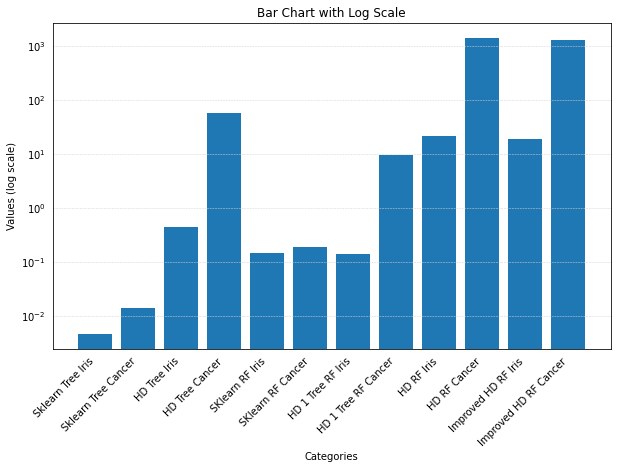

In [400]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

plt.bar(training_times['Name'], training_times['Training Time'])
plt.yscale('log')

# Set yticks at your specified values
yticks = [10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3)]
plt.yticks(yticks)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Values (log scale)')
plt.title('Bar Chart with Log Scale')

# Add a grid only at major ticks
plt.grid(axis='y', which='major', color='lightgray', linestyle='--', linewidth=0.5)

# Remove minor ticks
plt.tick_params(axis='x', which='both', bottom=False)
plt.tick_params(axis='y', which='both', left=False)

plt.show()

### Conclusion and Future Work

Our goal was to hard-code a random forest classifier using only NumPy and pandas. We used two toy data sets (the iris data set and the breast cancer data set) to compare our hard-coded classifier to scikit-learn's RandomForestClassifier. The iris data set had shape (150,5), which means that this data set is quite small. The breast cancer data set had shape (569, 31), which is many more columns than the iris data set but still not many rows. Excluding the target, all variables in these data sets were continuous. To make sure that our hard-coded model could handle boolean variables, we converted one of the iris data set columns to a binomial variable. 

As an intermediate step, we hard-coded a decision tree classifier. The training time of this classifier was 0.42 seconds on the iris data set, and 58 seconds on the cancer data set. Of course, these times might vary on different machines. When we compare these training times to scikit-learn's DecisionTreeClassifier, we see that our model's training time is roughly $10^2$ times higher on the iris data set, and roughly $7*10^3$ times higher on the breast cancer data set. On the iris data set, the prediction of both models were the same, and the accuracy of both models was 96.67%. On the breast cancer data set, 99% of the predictions were the same (1 prediction was different), and the accuracy was 93% for scikit-learn's decision tree and 92% for our hard-coded decision tree. This difference is negligible once random forests are trained.

Next, we modified our hard-coded decision tree classifier to build one of the trees that are part of a random forest. The fundamental difference between this tree and a standard decision tree is that at each step, only a subset of the variables is used to obtain the next best split. Since not all columns are considered at each step, these trees are trained faster than a standard decision tree. Specifically, we found that their training time is roughly 3 times lower on the iris data set, and 6 times lower on the breast cancer data set. 

Using the our modified decision tree, we hard-coded a random forest classifier. The training times for a random forest of 100 trees were roughly 21 seconds on the iris data set, and 23.5 minutes on the breast cancer data set. We believe that the reason for the very long training time on the breast cancer data set is due to the fact that the dimension of the data set is larger (in terms of both rows and columns) than the iris data set and that all variables are continuous, so that the model has to check roughly $450*2/3 = 300$ (the number of rows in the training set times the approximate probability that each data point is part of the bootstrapped data set that the tree is trained on) unique values to obtain the best split for each column. 

Comparing these results with the training time of scikit-learn's RandomForestClassifier, we found that the training time of our model is $1.4*10^2$ times larger for the iris data set, and $7.4*10^3$ times larger for the breast cancer data set. These results are consistent with the training times for decision trees. In addition, the predictions of both models were identical on both data sets. The accuracy on the iris data set was 100%, and the accuracy on the breast cancer data set was 95.61%. These results indicate that although the training time of our hard-coded model is much higher, the predictions of our model are completely equivalent to the ones of scikit-learn's RandomForestClassifier.

In an attempt to reduce the training time of the hard-coded models, we wrote a different function to train the decision trees of the random forest. The main difference between this new function an our old one is the way the best split for each column is determined. In the old function, the unique values in a column are determined, and for each unique value, the weighted Gini score is calculated so that the best split can be found. In the new function, the values unique values in the column are ordered and distributed into two bins, with one of the bins initially empty. Then, at each iteration the weighted Gini score is calculated, and the  lowest value in the initially full bin is moved to the initially empty bin. The advantage of this is that the data is split only once rather than at each iteration. With these new functions, we trained a random forest of 100 trees in 19 seconds on the Iris data set, and 21.3 minutes on the breast cancer data set. Thus, although there is a small improvement, the training times are very similar to the ones of our old function. The predictions are also essentially the same, with an accuracy of 96.5% on the breast cancer data set. 

In conclusion, we were successful in building a hard-coded random forest classifier. The predictions of our models are essentially identical to the prediction of scikit-learn's models, but the training times of our models are orders of magnitude larger. We managed to slightly improve the training time of our models, but this improvement is negligibly small. In order to significantly improve the training time of our models, we should try to vectorize the processes in our functions as much as possible. In addition, we might try to find a good split rather than the best split. This would likely not affect the accuracy of our models too much in large enough forests. Finally, we should try to train trees in parallel rather than one at a time.

# References 

- Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani, *An Introduction to Statistical Learning: with Applications in R* (Springer, 2013).
- Trevor Hastie, Robert Tibshirani, and Jerome Friedman, *The Elements of Statistical Learning*, Springer Series in Statistics
(Springer New York Inc., New York, NY, USA, 2001).
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://stats.stackexchange.com/questions/105487/the-efficiency-of-decision-tree